# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [58]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [25]:
# drop rows where 4th grade math scores are missing
df.dropna(subset=["AVG_MATH_4_SCORE"], inplace=True)

# fill missing enroll values with values from total enrollment (GRADES_ALL_G)
df["ENROLL"] = df["ENROLL"].fillna(df["GRADES_ALL_G"])

df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                           74
TOTAL_REVENUE                   125
FEDERAL_REVENUE                 125
STATE_REVENUE                   125
LOCAL_REVENUE                   125
TOTAL_EXPENDITURE               125
INSTRUCTION_EXPENDITURE         125
SUPPORT_SERVICES_EXPENDITURE    125
OTHER_EXPENDITURE               167
CAPITAL_OUTLAY_EXPENDITURE      125
GRADES_PK_G                      78
GRADES_KG_G                      74
GRADES_4_G                       74
GRADES_8_G                       74
GRADES_12_G                      74
GRADES_1_8_G                    167
GRADES_9_12_G                   116
GRADES_ALL_G                     74
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  1
AVG_READING_4_SCORE              44
AVG_READING_8_SCORE              87
ENROLL]                          74
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

How many years of data are logged in our dataset? 

In [28]:
# @@@ 1
df["YEAR"].unique() # from 1992 to 2019
df["YEAR"].nunique() # data from 13 different years

df["STATE"].unique()

array(['ALABAMA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO',
       'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA', 'FLORIDA',
       'GEORGIA', 'HAWAII', 'IDAHO', 'INDIANA', 'IOWA', 'KENTUCKY',
       'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN',
       'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'NEBRASKA',
       'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK',
       'NORTH_CAROLINA', 'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VIRGINIA', 'WEST_VIRGINIA', 'WISCONSIN',
       'WYOMING', 'ILLINOIS', 'KANSAS', 'MONTANA', 'NEVADA', 'OREGON',
       'VERMONT', 'ALASKA', 'SOUTH_DAKOTA', 'WASHINGTON', 'NATIONAL',
       'DODEA'], dtype=object)

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [36]:
# @@@ 2
mich_ohio = df[(df["STATE"] == "MICHIGAN") | (df["STATE"] == "OHIO")]

mich_ohio.groupby(["STATE", "YEAR"])["AVG_MATH_4_SCORE"].mean()

STATE     YEAR
MICHIGAN  1992    220.0
          2000    229.0
          2003    236.0
          2005    238.0
          2007    238.0
          2009    236.0
          2011    236.0
          2013    237.0
          2015    236.0
          2017    236.0
          2019    236.0
OHIO      1992    219.0
          2000    230.0
          2003    238.0
          2005    242.0
          2007    245.0
          2009    244.0
          2011    244.0
          2013    246.0
          2015    244.0
          2017    241.0
          2019    241.0
Name: AVG_MATH_4_SCORE, dtype: float64

Find the average for your chosen test across all states in 2019

In [37]:
# @@@ 3
df["AVG_MATH_4_SCORE"].mean()

np.float64(236.32743362831857)

For each state, find a maximum value for your chosen test score

In [39]:
# @@@ 4
df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [62]:
# @@@ 5
# total expenditure / student
df["EXPENDITURE_PER_STUDENT"] = df["TOTAL_EXPENDITURE"] / df["GRADES_ALL_G"]
df["INS_EXP_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["GRADES_ALL_G"]
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT,INS_EXP_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221,2.025197
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,7.939520,4.068693
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774,2.132082
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044,2.184247
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536,2.732512


Feature engineering justification: The expenditure per student can tell us exactly how much a state is spending per student, which would be different than the total expenditures, because that varies with state size. It is the same for the instruction expenditure per student, although this one focuses just on instruction expenditure, which would tell us how much money is spent per student on things that would aid instruction in the classroom. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

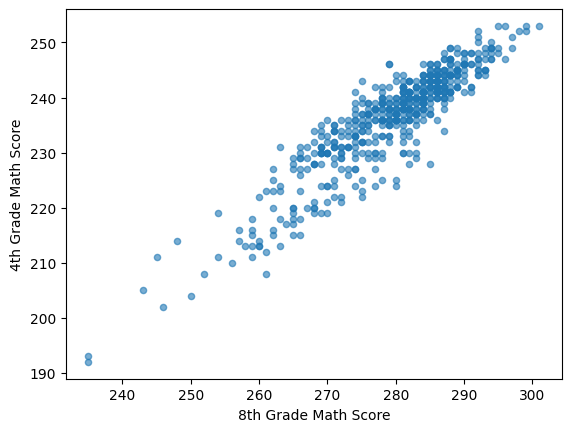

In [55]:
# @@@ 6
df.plot.scatter(x='AVG_MATH_8_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('8th Grade Math Score')
plt.ylabel('4th Grade Math Score')

There seems to be a pretty stong positive linear relationship between a state's average 8th grade math score and 4th grade math score in a given year. 

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

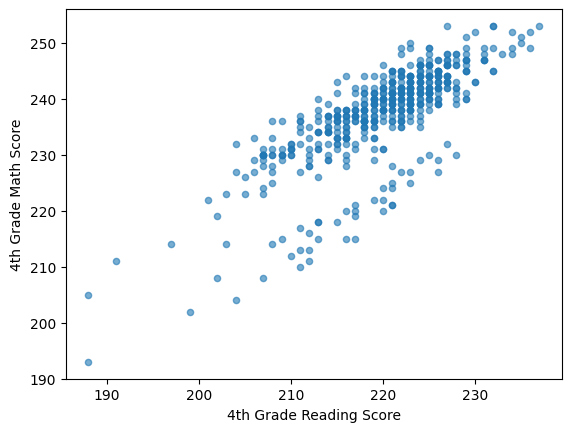

In [56]:
# @@@ 7
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Reading Score')
plt.ylabel('4th Grade Math Score')

There seems to be a pretty stong positive linear relationship between a state's average 4th grade reading score and 4th grade math score in a given year, although there seems to be two "lines" forming, one slighly under the main one. 

<Axes: title={'center': 'Distribution of 4th Grade Math Scores'}, ylabel='Frequency'>

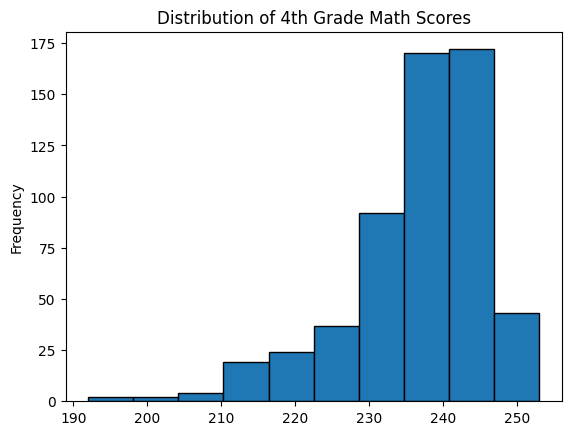

In [60]:
df.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 4th Grade Math Scores", edgecolor="black")

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [57]:
from sklearn.model_selection import train_test_split

In [64]:
# @@@ 8

X = df[['AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

# using median because the distribution of scores is skewed left
y.fillna(y.median(), inplace=True)

In [65]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [66]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [67]:
# @@@ 11
# create your model here
model = LinearRegression()

In [68]:
model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [82]:
# @@@ 12
np.mean(np.abs(y_pred-y_test))
np.mean((y_pred-y_test)**2)**0.5

np.float64(3.3977975842442616)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

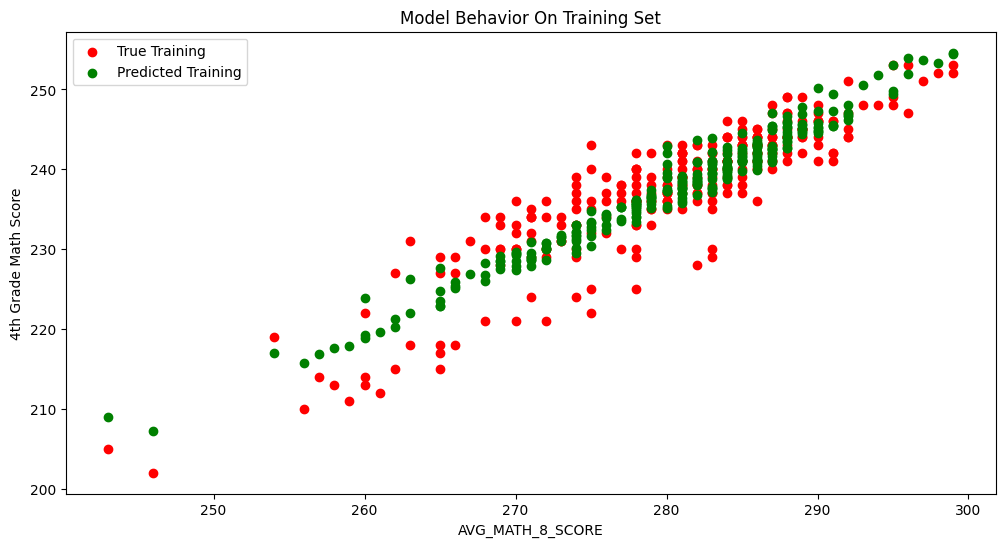

In [77]:
# @@@ 13

col_name = 'AVG_MATH_8_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('4th Grade Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

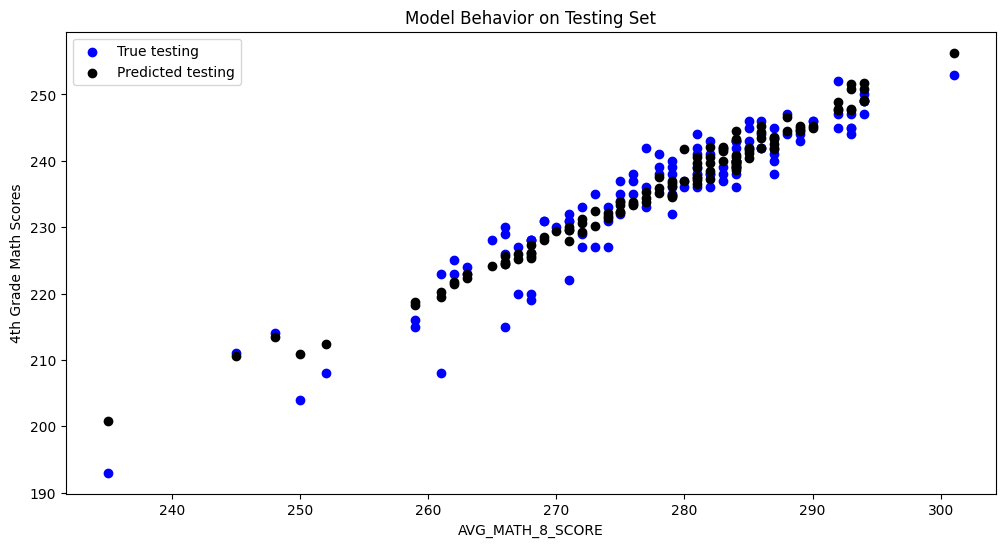

In [79]:
# @@@ 14


col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('4th Grade Math Scores')
plt.title("Model Behavior on Testing Set")